<a href="https://colab.research.google.com/github/mrFahrenhiet/COVID_19_Mask_Detection/blob/master/MaskDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask Detection

## Dataset

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d moussaid/mask-detection
!unzip 'mask-detection.zip'

 86% 68.0M/78.8M [00:00<00:00, 55.2MB/s]
100% 78.8M/78.8M [00:01<00:00, 77.4MB/s]
Archive:  mask-detection.zip
  inflating: face_mask_data/face_with_mask_0.jpg  
  inflating: face_mask_data/face_with_mask_1.jpg  
  inflating: face_mask_data/face_with_mask_10.jpg  
  inflating: face_mask_data/face_with_mask_100.jpg  
  inflating: face_mask_data/face_with_mask_101.jpg  
  inflating: face_mask_data/face_with_mask_102.jpg  
  inflating: face_mask_data/face_with_mask_103.jpg  
  inflating: face_mask_data/face_with_mask_104.jpg  
  inflating: face_mask_data/face_with_mask_105.jpg  
  inflating: face_mask_data/face_with_mask_106.jpg  
  inflating: face_mask_data/face_with_mask_107.jpg  
  inflating: face_mask_data/face_with_mask_108.jpg  
  inflating: face_mask_data/face_with_mask_109.jpg  
  inflating: face_mask_data/face_with_mask_11.jpg  
  inflating: face_mask_data/face_with_mask_110.jpg  
  inflating: face_mask_data/face_with_mask_111.jpg  
  inflating: face_mask_data/face_with_mask_112.

In [53]:
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset
!unzip 'covid-face-mask-detection-dataset.zip'

 94% 194M/207M [00:03<00:00, 46.8MB/s]
100% 207M/207M [00:03<00:00, 56.6MB/s]
Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/

In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.applications import MobileNetV2
import re
from shutil import copyfile
import shutil
import random
import os

Using TensorFlow backend.


In [3]:
img_list = os.listdir('./face_mask_data')

In [4]:
os.mkdir('./Dataset')
os.mkdir('./Dataset/Train')
os.mkdir('./Dataset/Val')
os.mkdir('./Dataset/Test')

In [5]:
os.mkdir('./Dataset/Train/Mask')
os.mkdir('./Dataset/Train/No-Mask')
os.mkdir('./Dataset/Val/Mask')
os.mkdir('./Dataset/Val/No-Mask')
os.mkdir('./Dataset/Test/Mask')
os.mkdir('./Dataset/Test/No-Mask')

In [6]:
data = os.listdir('/content/face_mask_data')

In [7]:
type(data[0])

str

In [8]:
data_mask = [i for i in data if 'face_with_mask' in i]

In [9]:
data_no_mask = [i for i in data if 'face_without_mask' in i]

In [10]:
data_mask = ['/content/face_mask_data/'+i for i in data_mask]
data_no_mask = ['/content/face_mask_data/'+i for i in data_no_mask]

In [11]:
data_mask

['/content/face_mask_data/face_with_mask_210.jpg',
 '/content/face_mask_data/face_with_mask_332.jpg',
 '/content/face_mask_data/face_with_mask_314.jpg',
 '/content/face_mask_data/face_with_mask_68.jpg',
 '/content/face_mask_data/face_with_mask_385.jpg',
 '/content/face_mask_data/face_with_mask_289.jpg',
 '/content/face_mask_data/face_with_mask_428.jpg',
 '/content/face_mask_data/face_with_mask_437.jpg',
 '/content/face_mask_data/face_with_mask_266.jpg',
 '/content/face_mask_data/face_with_mask_447.jpg',
 '/content/face_mask_data/face_with_mask_10.jpg',
 '/content/face_mask_data/face_with_mask_242.jpg',
 '/content/face_mask_data/face_with_mask_104.jpg',
 '/content/face_mask_data/face_with_mask_200.jpg',
 '/content/face_mask_data/face_with_mask_256.jpg',
 '/content/face_mask_data/face_with_mask_110.jpg',
 '/content/face_mask_data/face_with_mask_233.jpg',
 '/content/face_mask_data/face_with_mask_291.jpg',
 '/content/face_mask_data/face_with_mask_333.jpg',
 '/content/face_mask_data/face_wi

In [12]:
data_no_mask

['/content/face_mask_data/face_without_mask_222.jpg',
 '/content/face_mask_data/face_without_mask_268.jpg',
 '/content/face_mask_data/face_without_mask_502.jpg',
 '/content/face_mask_data/face_without_mask_179.jpg',
 '/content/face_mask_data/face_without_mask_471.jpg',
 '/content/face_mask_data/face_without_mask_456.jpg',
 '/content/face_mask_data/face_without_mask_290.jpg',
 '/content/face_mask_data/face_without_mask_516.jpg',
 '/content/face_mask_data/face_without_mask_325.jpg',
 '/content/face_mask_data/face_without_mask_461.jpg',
 '/content/face_mask_data/face_without_mask_469.jpg',
 '/content/face_mask_data/face_without_mask_147.jpg',
 '/content/face_mask_data/face_without_mask_194.jpg',
 '/content/face_mask_data/face_without_mask_143.jpg',
 '/content/face_mask_data/face_without_mask_200.jpg',
 '/content/face_mask_data/face_without_mask_466.jpg',
 '/content/face_mask_data/face_without_mask_190.jpg',
 '/content/face_mask_data/face_without_mask_51.jpg',
 '/content/face_mask_data/fac

In [13]:
random.shuffle(data_mask)
random.shuffle(data_no_mask)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_mask_len = round(len(data_mask)*0.7)
train_no_mask_len = round(len(data_no_mask)*0.7)

val_mask_len = round(len(data_mask)*0.1)
val_no_mask_len = round(len(data_no_mask)*0.1)

test_mask_len = round(len(data_mask)*0.2)
test_no_mask_len = round(len(data_no_mask)*0.2)

In [16]:
print(train_mask_len)
print(test_mask_len)
print(val_mask_len)

318
91
45


In [17]:
test_mask_len += train_mask_len
test_no_mask_len += train_no_mask_len

In [18]:
val_mask_len += test_mask_len
val_no_mask_len += test_no_mask_len

In [19]:
print(train_mask_len)
print(test_mask_len)
print(val_mask_len)

318
409
454


In [20]:
print(train_no_mask_len)
print(test_no_mask_len)
print(val_no_mask_len)

379
487
541


In [23]:
train_mask = data_mask[:train_mask_len]
test_mask = data_mask[train_mask_len:test_mask_len]
val_mask = data_mask[test_mask_len:val_mask_len]

In [21]:
train_no_mask = data_no_mask[:train_no_mask_len]
test_no_mask = data_no_mask[train_no_mask_len:test_no_mask_len]
val_no_mask = data_no_mask[test_no_mask_len:val_no_mask_len]

In [24]:
print(train_mask)
print(train_no_mask)

['/content/face_mask_data/face_with_mask_73.jpg', '/content/face_mask_data/face_with_mask_397.jpg', '/content/face_mask_data/face_with_mask_385.jpg', '/content/face_mask_data/face_with_mask_225.jpg', '/content/face_mask_data/face_with_mask_302.jpg', '/content/face_mask_data/face_with_mask_377.jpg', '/content/face_mask_data/face_with_mask_220.jpg', '/content/face_mask_data/face_with_mask_172.jpg', '/content/face_mask_data/face_with_mask_315.jpg', '/content/face_mask_data/face_with_mask_219.jpg', '/content/face_mask_data/face_with_mask_65.jpg', '/content/face_mask_data/face_with_mask_95.jpg', '/content/face_mask_data/face_with_mask_168.jpg', '/content/face_mask_data/face_with_mask_144.jpg', '/content/face_mask_data/face_with_mask_211.jpg', '/content/face_mask_data/face_with_mask_67.jpg', '/content/face_mask_data/face_with_mask_419.jpg', '/content/face_mask_data/face_with_mask_293.jpg', '/content/face_mask_data/face_with_mask_18.jpg', '/content/face_mask_data/face_with_mask_94.jpg', '/con

In [25]:
print(test_mask)
print(test_no_mask)

['/content/face_mask_data/face_with_mask_44.jpg', '/content/face_mask_data/face_with_mask_357.jpg', '/content/face_mask_data/face_with_mask_324.jpg', '/content/face_mask_data/face_with_mask_125.jpg', '/content/face_mask_data/face_with_mask_316.jpg', '/content/face_mask_data/face_with_mask_429.jpg', '/content/face_mask_data/face_with_mask_7.jpg', '/content/face_mask_data/face_with_mask_347.jpg', '/content/face_mask_data/face_with_mask_121.jpg', '/content/face_mask_data/face_with_mask_425.jpg', '/content/face_mask_data/face_with_mask_285.jpg', '/content/face_mask_data/face_with_mask_368.jpg', '/content/face_mask_data/face_with_mask_436.jpg', '/content/face_mask_data/face_with_mask_81.jpg', '/content/face_mask_data/face_with_mask_314.jpg', '/content/face_mask_data/face_with_mask_294.jpg', '/content/face_mask_data/face_with_mask_229.jpg', '/content/face_mask_data/face_with_mask_207.jpg', '/content/face_mask_data/face_with_mask_400.jpg', '/content/face_mask_data/face_with_mask_4.jpg', '/con

In [26]:
print(val_mask)
print(val_no_mask)

['/content/face_mask_data/face_with_mask_14.jpg', '/content/face_mask_data/face_with_mask_326.jpg', '/content/face_mask_data/face_with_mask_114.jpg', '/content/face_mask_data/face_with_mask_71.jpg', '/content/face_mask_data/face_with_mask_210.jpg', '/content/face_mask_data/face_with_mask_390.jpg', '/content/face_mask_data/face_with_mask_194.jpg', '/content/face_mask_data/face_with_mask_354.jpg', '/content/face_mask_data/face_with_mask_101.jpg', '/content/face_mask_data/face_with_mask_240.jpg', '/content/face_mask_data/face_with_mask_164.jpg', '/content/face_mask_data/face_with_mask_47.jpg', '/content/face_mask_data/face_with_mask_195.jpg', '/content/face_mask_data/face_with_mask_103.jpg', '/content/face_mask_data/face_with_mask_50.jpg', '/content/face_mask_data/face_with_mask_199.jpg', '/content/face_mask_data/face_with_mask_152.jpg', '/content/face_mask_data/face_with_mask_192.jpg', '/content/face_mask_data/face_with_mask_409.jpg', '/content/face_mask_data/face_with_mask_358.jpg', '/c

In [27]:
for i in range(len(train_mask)):
  shutil.move(train_mask[i],"/content/Dataset/Train/Mask")

In [28]:
for i in range(len(train_no_mask)):
  shutil.move(train_no_mask[i],"/content/Dataset/Train/No-Mask")

In [29]:
for i in range(len(val_mask)):
  shutil.move(val_mask[i],"/content/Dataset/Val/Mask")

for i in range(len(val_no_mask)):
  shutil.move(val_no_mask[i],"/content/Dataset/Val/No-Mask")

In [30]:
for i in range(len(test_mask)):
  shutil.move(test_mask[i],"/content/Dataset/Test/Mask")

for i in range(len(test_no_mask)):
  shutil.move(test_no_mask[i],"/content/Dataset/Test/No-Mask")

In [54]:
data_mask_train2 = os.listdir('/content/New Masks Dataset/Train/Mask')
data_no_mask_train2 = os.listdir('/content/New Masks Dataset/Train/Non Mask')
data_mask_train2 = ['/content/New Masks Dataset/Train/Mask/'+ i for i in data_mask_train2]
data_no_mask_train2 = ['/content/New Masks Dataset/Train/Non Mask/'+ i for i in data_no_mask_train2]

In [55]:
print(data_no_mask_train2)
print(data_mask_train2)

['/content/New Masks Dataset/Train/Non Mask/76.jpg', '/content/New Masks Dataset/Train/Non Mask/261.jpg', '/content/New Masks Dataset/Train/Non Mask/347.jpg', '/content/New Masks Dataset/Train/Non Mask/229.jpg', '/content/New Masks Dataset/Train/Non Mask/138.jpg', '/content/New Masks Dataset/Train/Non Mask/135.jpg', '/content/New Masks Dataset/Train/Non Mask/310.jpg', '/content/New Masks Dataset/Train/Non Mask/207.jpg', '/content/New Masks Dataset/Train/Non Mask/137.jpg', '/content/New Masks Dataset/Train/Non Mask/285.jpg', '/content/New Masks Dataset/Train/Non Mask/271.jpg', '/content/New Masks Dataset/Train/Non Mask/66.jpg', '/content/New Masks Dataset/Train/Non Mask/88.jpg', '/content/New Masks Dataset/Train/Non Mask/125.jpg', '/content/New Masks Dataset/Train/Non Mask/105.jpg', '/content/New Masks Dataset/Train/Non Mask/350.jpg', '/content/New Masks Dataset/Train/Non Mask/201.jpg', '/content/New Masks Dataset/Train/Non Mask/263.jpg', '/content/New Masks Dataset/Train/Non Mask/326.j

In [31]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
len(data_no_mask)

541

In [34]:
len(data_mask)

454

Text(0.5, 1.0, 'Proportion of each observed category')

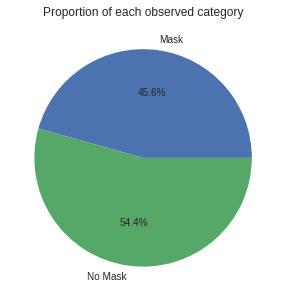

In [35]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
pie = [len(data_mask),len(data_no_mask)]
plt.pie(pie,
        labels = ['Mask','No Mask'],
        autopct='%1.1f%%'       
       )
plt.title('Proportion of each observed category')


## Preprocess

In [36]:
from keras.applications.mobilenet_v2 import preprocess_input

In [48]:
img = keras.preprocessing.image.load_img("/content/Dataset/Test/Mask/face_with_mask_10.jpg",target_size=(224,224))
img = keras.preprocessing.image.img_to_array(img)

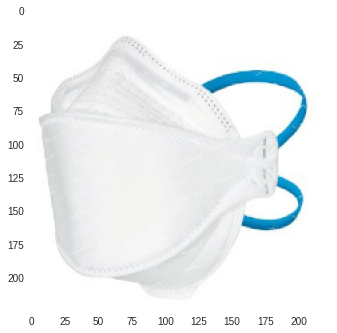

In [45]:
plt.imshow(img)
plt.grid(False)

In [49]:
img_pre = preprocess_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


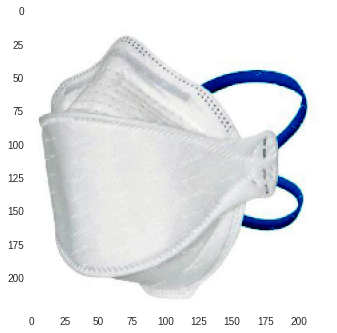

In [50]:
plt.imshow(img_pre)
plt.grid(False)

In [51]:
from keras.preprocessing import image